Launch interactive version: 👉👉👉 [![Try ``dyce``](https://jupyterlite.readthedocs.io/en/latest/_static/badge.svg)](https://posita.github.io/dyce-notebooks/lab?path=stack-exchange%2Fneon-city-overdrive-171498%2Fneon_city_overdrive.ipynb) 👈👈👈 *[[source](https://github.com/posita/dyce-notebooks/tree/main/notebooks/stack-exchange/neon-city-overdrive-171498)]*

## [``dyce``](https://posita.github.io/dyce/) translation and comparison of [Carcer’s](https://rpg.stackexchange.com/a/171505/71245) and [Karonen’s](https://rpg.stackexchange.com/a/194712/71245) solutions to “[How to calculate the probabilities for eliminative dice pools (dice cancelling mechanic) in Neon City Overdrive?](https://rpg.stackexchange.com/a/195045/71245)”

Once viewing this notebook in Jupyter Lab, select ``Run All Cells`` from the ``Run`` menu above.

In [1]:
# Install additional requirements if necessary
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    try:
        import anydyce
    except (ImportError, ModuleNotFoundError):
        requirements = ["anydyce~=0.1.4"]
        try:
            import piplite ; await piplite.install(requirements)
        except ImportError:
            import pip ; pip.main(["install"] + requirements)
    import anydyce

Substantive code is in [``neon_city_overdrive.py``](neon_city_overdrive.py).

In [2]:
import dyce  # pre-import dyce to make sure it's excluded from our time measurements below

def do_it(nco_func, a_range, d_range):
    return [
        (f"{a_pool_size}d6 vs. {d_pool_size}d6", nco_func(a_pool_size, d_pool_size))
        for a_pool_size in a_range
        for d_pool_size in d_range
    ]

In [3]:
%%timeit  # Carcer - [1-4]d6 vs. [0-4]d6
%run neon_city_overdrive.py
do_it(nco_carcer, range(1, 5), range(5))

339 ms ± 3.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit  # Karonen - [1-4]d6 vs. [0-4]d6
%run neon_city_overdrive.py  # (re)defines nco function for getting accurate first-run (pre-memoization) measurements
do_it(nco_karonen, range(1, 5), range(5))

15 ms ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit  # Karonen - [1-11]d6 vs. [0-11]d6
%run neon_city_overdrive.py
do_it(nco_karonen, range(1, 12), range(12))  # these dice go to eleven!

321 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# Check that each produces equivalent results
%run neon_city_overdrive.py

for a_pool_size in range(1, 4):
    for d_pool_size in range(4):
        assert (
            nco_carcer(a_pool_size, d_pool_size)
            == nco_karonen(a_pool_size, d_pool_size)
        ), (
            f"nco_carcer({a_pool_size}, {d_pool_size})"
            f" != nco_karonen({a_pool_size}, {d_pool_size})"
        )

In [7]:
from anydyce import BreakoutType, jupyter_visualize

a_range = tuple(range(1, 6))
d_range = tuple(range(6))

# Visualize [1-5]d6 vs. [0-5]d6 with burst graphs
jupyter_visualize(
    do_it(nco_karonen, a_range, d_range),
    default_breakout_type=BreakoutType.BURST,
)

## [``dyce``](https://posita.github.io/dyce/) solution to [“Anydice: Neon City Overdrive type eliminative dice pool BUT danger dice cancel equal to AND less than”](https://rpg.stackexchange.com/a/198632/71245) and comparison

I recently [added the ``nco_so_dangerous`` implementation to ``neon_city_overdrive.py``](https://github.com/posita/dyce-notebooks/blob/main/notebooks/stack-exchange/neon-city-overdrive-171498/neon_city_overdrive.py#L132-L177). Below is a comparison of the two mechanics. Gray outer rings show the basic mechanic. Red inner rings show the dangerous cancelation modification.

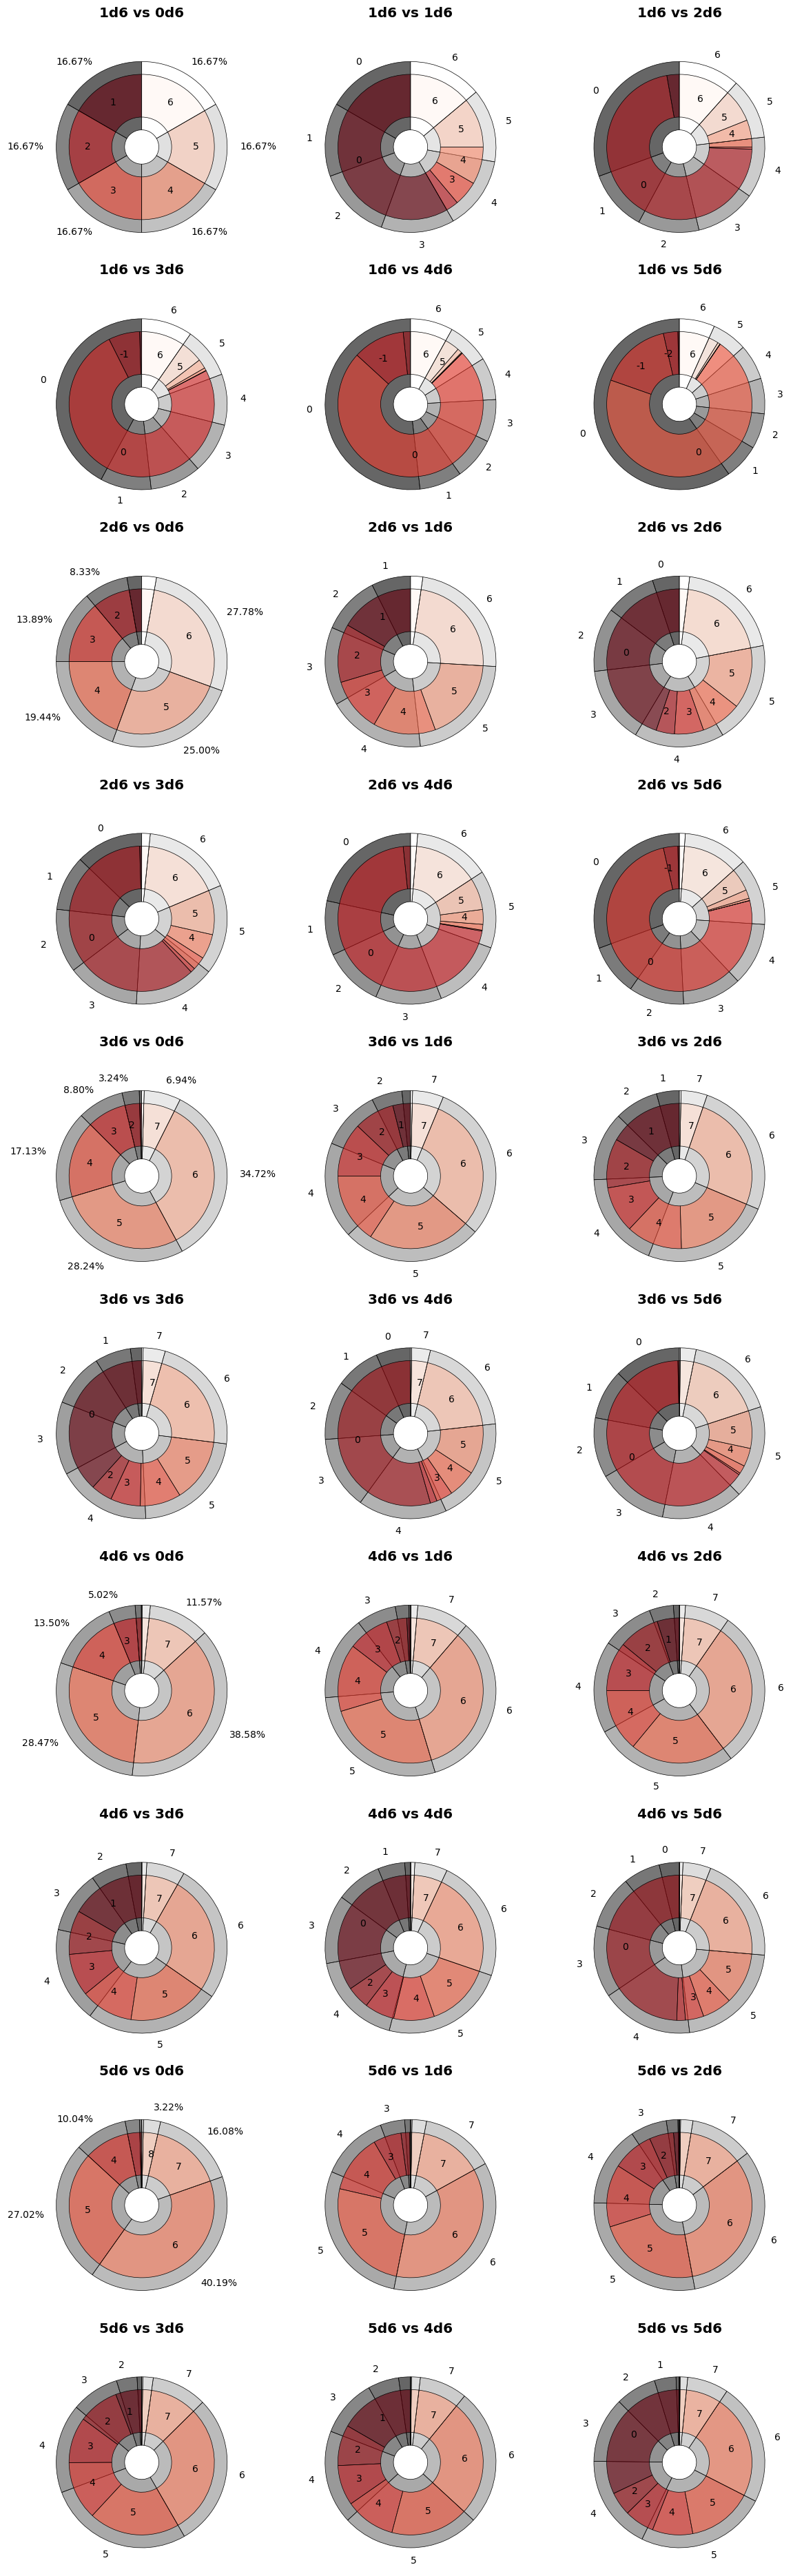

In [8]:
import matplotlib
from anydyce.viz import plot_bar, plot_burst

%run neon_city_overdrive.py

num_comparisons = len(a_range) * len(d_range)
columns = 3
rows = num_comparisons // columns + int(num_comparisons % columns > 0)
grid = (rows, columns)

for i, (a, d) in enumerate((a, d) for a in a_range for d in d_range):
    row = i // columns
    col = i % columns
    loc = (row, col)
    ax = matplotlib.pyplot.subplot2grid(grid, loc)
    plot_burst(
        ax,
        h_inner=nco_so_dangerous(a, d),
        h_outer=nco_karonen(a, d),
        inner_color="Reds",
        outer_color="gist_gray_r",
        title=f"{a}d6 vs {d}d6",
    )

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()